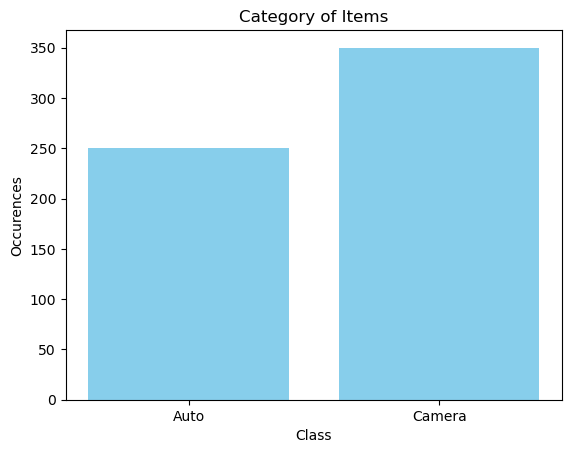

In [7]:
# Epinions.com is a website where people can post reviews of products and services. 
#It covers a wide variety of topics. For this case study, we downloaded a set of 600 posts about digital cameras and cars and saved as “Eopinions.csv”. 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import RocCurveDisplay

def cm(file):
    # Read the file as a pandas data-frame. 
    df = pd.read_csv(file) 
    
    # Perform Label Encoding on ‘class’ column. 
    label_encoder = LabelEncoder()
    c = df['class']
    encoded_data = label_encoder.fit_transform(c)
    df['label'] = encoded_data
    df.to_csv("M17_Eopinions.csv")

    # Plot a bar graph to compare the frequencies of both the classes.
    c = df['label']
    auto = camera = 0
    for d in c:
        if (d == 0):
            auto = auto + 1
        elif (d==1):
            camera = camera + 1
    v = [auto, camera]
    l = ['Auto','Camera']
    plt.bar(l, v, color='skyblue')
    plt.xlabel('Class')
    plt.ylabel('Occurences')
    plt.title('Category of Items')
    plt.show()

cm("M17_Eopinions.csv")

In [13]:
#Preprocess the ‘text’ column 
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize as wt
from nltk.corpus import stopwords
from nltk.stem import wordnet
from nltk.stem import WordNetLemmatizer
wl = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
from sacremoses import MosesDetokenizer
from nltk.tokenize.treebank import TreebankWordDetokenizer as twd

def tokenize(content):
    return wt(content)

def RemoveStopWords(content):
    filtered_sentence = []
    for w in content:
        if w.lower() not in stop_words:
            filtered_sentence.append(w)
    return (filtered_sentence)

def Lemmatize(content):
        return(wl.lemmatize(content))

def refine(user_string):      
    #print("Entered String : ", str(user_string))     
    text_tokens = tokenize(user_string)     
    #print("Entered String (tokenized):\n", text_tokens)     
    removed_stop_words = RemoveStopWords(text_tokens)     
    ##print("Entered String (Stop Words Removed):\n", removed_stop_words)         
    #print("Entered String (Lemmatized):\n")    
    lw = []
    for word in removed_stop_words:         
        w = Lemmatize(word) 
        lw.append(w)
    return(lw)

def cm(file):
    df = pd.read_csv(file) 
    c = df['text']
    p_d = []
    detokenizer = MosesDetokenizer()
    for eachtext in c:
        preprocessed = refine(eachtext)
        pdt = detokenizer.detokenize(preprocessed, return_str=True)
        p_d.append(pdt)
    df['preprocessed'] = p_d
    df.to_csv(file)
    df1 = pd.read_csv(file)
    c = df1['preprocessed']
    p_dd = []
    for i in c:
        if (i != '\n'):
            p_dd.append(i)
    df1['preprocessed2'] = p_dd
    df1.to_csv(file)
    #print(p_dd)
    
cm("M17_Eopinions.csv")

In [24]:
# Vectorize the text using CountVectorizer 
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
from sacremoses import MosesDetokenizer
from nltk.tokenize.treebank import TreebankWordDetokenizer as twd

def CountVectorization(S1):
    review_list = [S1]
    count_vect = CountVectorizer()
    X_counts = count_vect.fit_transform(review_list)
    return(X_counts.toarray())

def cm(file):
    df = pd.read_csv(file)
    desc = df['preprocessed2']
    refined_tokens = []
    for d in desc:
        refined = CountVectorization(d)
        refined_tokens.append(refined)
    df['countvectorizer'] = refined_tokens
    df.to_csv(file)

cm("M17_Eopinions.csv")

In [46]:
# Vectorize the text using CountVectorizer --- trying again
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
from sacremoses import MosesDetokenizer
from nltk.tokenize.treebank import TreebankWordDetokenizer as twd

def cm(file):
    df = pd.read_csv(file)
    desc = df['preprocessed2']
    y = df['label']
    count_vect = CountVectorizer(lowercase=True, stop_words='english', min_df=2)
    X_counts = count_vect.fit_transform(desc)
    print(type(X_counts))
    print(X_counts.shape)
    X_names = count_vect.get_feature_names_out()
    X_counts = pd.DataFrame(X_counts.toarray(), columns=X_names)
    print(X_counts.shape)
    print(X_counts.head())
    X_counts.to_csv("data.csv", sep=',', encoding='utf-8', index=False, header=True)
    y.to_csv("data.csv")
    
cm("M17_Eopinions.csv")

<class 'scipy.sparse._csr.csr_matrix'>
(600, 6141)
(600, 6141)
   00  000  01  02  03  048  08  0l  10  100  ...  zeiss  zero  zing  zip  \
0   0    0   0   0   0    0   0   0   0    0  ...      0     0     0    0   
1   0    0   0   0   0    0   0   0   0    0  ...      0     0     0    0   
2   0    0   0   0   0    0   0   0   0    0  ...      0     0     0    0   
3   0    0   0   0   0    0   0   0   0    0  ...      0     0     0    0   
4   0    0   0   0   0    0   0   0   0    1  ...      0     0     0    0   

   zippy  zone  zoom  zoombrowser  zoomed  zooming  
0      0     0     0            0       0        0  
1      0     0     0            0       0        0  
2      0     0     0            0       0        0  
3      0     0     0            0       0        0  
4      0     0     5            0       0        0  

[5 rows x 6141 columns]


In [41]:
# deleting unnecessary columns in M17_Eopinions csv file

import pandas as pd
import numpy as np

f = pd.read_csv("M17_Eopinions.csv", usecols=["class","text","label","countvectorizer","preprocessed", "preprocessed2"])
f.to_csv("M17_Eopinions.csv", index=False)

In [16]:
# Split the dataset into 2 parts namely “train.csv” and “test.csv” having 80% and 20% of the data respectively from the original data. 
# These are your Train and Test Data. Make sure train and test data are having same proportion of data points as the original data 

import pandas as pd
from sklearn.model_selection import train_test_split

def split_data(file):
    df = pd.read_csv(file)
    X_train, X_test, y_train, y_test = train_test_split(df["countvectorizer"], df["label"], test_size=0.2)
    #X_t = str(X_train) + str(y_train)
    X_train.to_csv("train.csv")
    X_test.to_csv("test.csv")
    
split_data("M17_Eopinions.csv")

<class 'numpy.ndarray'>
Confusion Matrix :
[[ 0 40]
 [ 0 80]]
Accuracy :
0.6666666666666666
Misclassification Rate:
0.33333333333333337
Precision :
0.6666666666666666
Recall :
1.0
F1 Score :
0.8
False Positives :
40


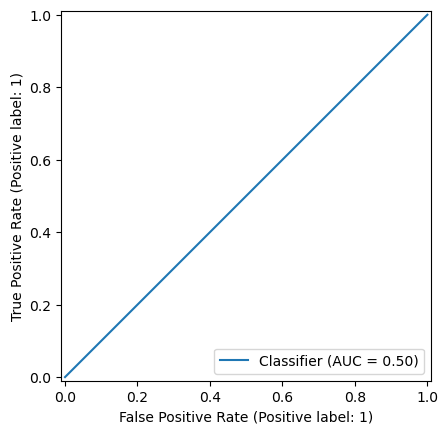

In [60]:
# • Train your machine learning algorithm for classification and prepare a model (you can choose any appropriate algorithm of your choice) 
# • Now test the model on the Test data and evaluate the Performance by providing Confusion Matrix for your model.  
# • Plot ROC Curve. 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import RocCurveDisplay

def run_training(file):
    #train, test = train_test_split(df, test_size=0.2)
    df = pd.read_csv(file)
    dfy = df['label']
    dfx = df.drop('label', axis=1)
    #print(dfx.shape)
    #print(dfy.shape)
    
    X_train, X_test, y_train, y_test = train_test_split(dfx, dfy, test_size=0.2)
    #print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    c = MultinomialNB() 
    c.fit(X_train, y_train)
    y_pred = c.predict(X_test)
    print(type(y_pred))

    actualValue = y_test
    predictedValue = y_pred
    print("Confusion Matrix :")
    cmt = confusion_matrix(actualValue, predictedValue)
    tn, fp, fn, tp = confusion_matrix(actualValue, predictedValue).ravel()
    print(cmt)
    print("Accuracy :")
    acc = accuracy_score(actualValue, predictedValue)
    print(acc)
    print("Misclassification Rate:")
    mis = 1 - accuracy_score(actualValue, predictedValue)
    print(mis)
    print("Precision :")
    ps = average_precision_score(actualValue, predictedValue)
    print(ps)
    print("Recall :")
    re = recall_score(actualValue, predictedValue)
    print(re)
    print("F1 Score :")
    f1 = f1_score(actualValue, predictedValue)
    print(f1)
    print("False Positives :")
    print(fp)
    #skplt.metrics.plot_roc_curve(actualValue, predictedValue)
    RocCurveDisplay.from_predictions(actualValue, predictedValue)

run_training("data.csv")